# Q1 (Decision_tree_classifier)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
penguins=pd.read_csv('/content/drive/MyDrive/Data_PRML/penguins.csv')

In [ ]:
penguins=penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


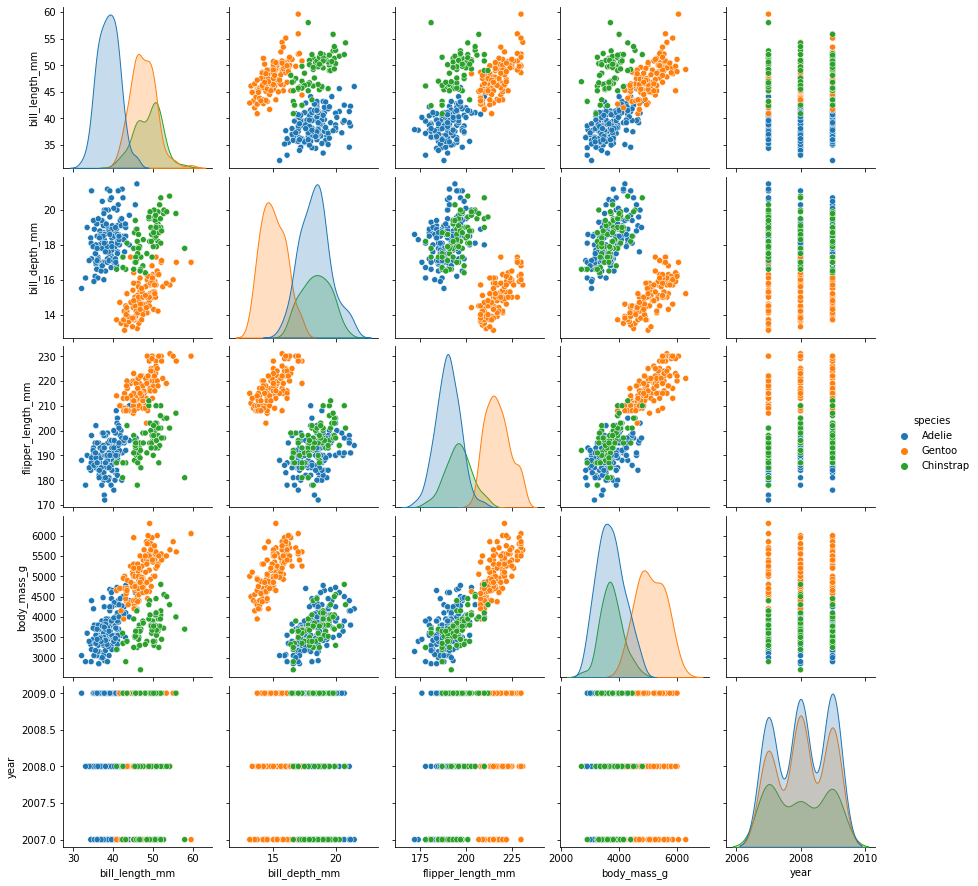

In [ ]:
sns.pairplot(penguins, hue='species')

In [ ]:
class Node:
  def __init__(self,dataset,left_branch,right_branch,Best_feature):
    self.predictions=dataset['species'].value_counts().nlargest(1)
    self.left=left_branch
    self.right=right_branch
    self.feature=Best_feature

In [ ]:
def gini_index(dataset,threshold,feature):
  main_values=dataset['species'].unique()
  left_df=dataset[dataset[feature]<=threshold]
  right_df=dataset[dataset[feature]>threshold]
  a=0
  b=0
  for val in main_values:
    a+=(left_df[left_df['species']==val].shape[0]/left_df.shape[0])**2
  a=1-a
  for val in main_values:
    b+=(right_df[right_df['species']==val].shape[0]/right_df.shape[0])**2
  b=1-b
  g=(((left_df.shape[0])/dataset.shape[0])*a)+(((right_df.shape[0])/dataset.shape[0])*b) 
  return g 

In [ ]:
def cont_to_cat(dataset,feature):
  Min=dataset[feature].min()
  Max=dataset[feature].max()
  List=list(np.arange(Min,Max,1))
  G=1
  threshold=None
  for val in List:
    g=gini_index(dataset,val,feature)
    if(G>g):
      G=g
      threshold=val
  dataset.loc[dataset[feature]<=threshold,feature]=0
  dataset.loc[dataset[feature]>threshold,feature]=1    
  return G   

In [ ]:
features=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
for feature in features:
  g=cont_to_cat(penguins,feature)

43.1
16.1
206.0
4500.0


In [ ]:
penguins.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.0,1.0,0.0,0.0,male,2007
1,Adelie,Torgersen,0.0,1.0,0.0,0.0,female,2007
2,Adelie,Torgersen,0.0,1.0,0.0,0.0,female,2007
4,Adelie,Torgersen,0.0,1.0,0.0,0.0,female,2007
5,Adelie,Torgersen,0.0,1.0,0.0,0.0,male,2007
6,Adelie,Torgersen,0.0,1.0,0.0,0.0,female,2007
7,Adelie,Torgersen,0.0,1.0,0.0,1.0,male,2007
12,Adelie,Torgersen,0.0,1.0,0.0,0.0,female,2007
13,Adelie,Torgersen,0.0,1.0,0.0,0.0,male,2007
14,Adelie,Torgersen,0.0,1.0,0.0,0.0,male,2007


In [ ]:
def get_feature(dataset):
  best=None
  gini=1
  features=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
  for feature in features:
    b=cont_to_cat(dataset,feature)
    if(gini>b):
      gini=b
      best=feature
  return gini,best 

In [ ]:
user_prompt = 0.3
user_enable = True
Y=penguins['species']
X=penguins[['species','bill_length_mm','bill_depth_mm','flipper_length_mm'	,'body_mass_g']]
x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)

In [ ]:
def build_tree(dataset,max_depth):
  if(max_depth==0):
    return Node(dataset,None,None,None)
  elif(len(dataset)==0):
    return None
  else:
    gini,best_feature=get_feature(dataset)
    if(best_feature!=None):
      left_df=dataset[dataset[best_feature]==0]
      right_df=dataset[dataset[best_feature]==1]
      left_branch=build_tree(left_df,max_depth-1)
      right_branch=build_tree(right_df,max_depth-1)
      return Node(dataset,left_branch,right_branch,best_feature)
    else:
      return Node(dataset,None,None,None)  

In [ ]:
my_tree=build_tree(x_train,3)

In [ ]:
def print_tree(node, spacing=""):
    if isinstance(node, Node):
        print (spacing + "Predict", node.predictions)
    if(node!=None):    
      print (spacing + str(node.feature))
      print (spacing + '--> Left:')
      print_tree(node.left, spacing + "  ")
      print (spacing + '--> Right:')
      print_tree(node.right, spacing + "  ")

In [ ]:
print_tree(my_tree)

Predict Adelie    103
Name: species, dtype: int64
flipper_length_mm
--> Left:
  Predict Adelie    102
Name: species, dtype: int64
  bill_length_mm
  --> Left:
    Predict Adelie    97
Name: species, dtype: int64
    bill_depth_mm
    --> Left:
      Predict Adelie    4
Name: species, dtype: int64
      None
      --> Left:
      --> Right:
    --> Right:
      Predict Adelie    93
Name: species, dtype: int64
      None
      --> Left:
      --> Right:
  --> Right:
    Predict Chinstrap    41
Name: species, dtype: int64
    body_mass_g
    --> Left:
      Predict Chinstrap    40
Name: species, dtype: int64
      None
      --> Left:
      --> Right:
    --> Right:
      Predict Adelie    2
Name: species, dtype: int64
      None
      --> Left:
      --> Right:
--> Right:
  Predict Gentoo    79
Name: species, dtype: int64
  bill_depth_mm
  --> Left:
    Predict Gentoo    70
Name: species, dtype: int64
    bill_length_mm
    --> Left:
      Predict Gentoo    5
Name: species, dtype: int64


In [ ]:
def classify(row, node):
    if(node.left==None or node.right==None):
      return node.predictions 
    elif(row[node.feature]==0):
      return classify(row,node.left)
    elif(row[node.feature]==1):
      return classify(row,node.right)
         

In [ ]:
pred=[]
for row in x_test.iterrows():
  pred.append(str(classify(row[1],my_tree)).split()[0])

In [ ]:
accuracy_score(y_test,pred)

0.98

# Q2 (Hyperparameters)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [ ]:
energy=pd.read_csv('/content/drive/MyDrive/Data_PRML/energy.csv')

In [ ]:
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
energy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [ ]:
user_prompt = 0.3
user_enable = True
Y=energy['Y1']
X=energy[['X1','X2','X3','X4','X5','X6','X7','X8']]
x_train,x_remain,y_train,y_remain = tts(X,Y,test_size=user_prompt,shuffle=user_enable)
x_test,x_valid,y_test,y_valid = tts(x_remain,y_remain,test_size=0.333333333333,shuffle=user_enable)

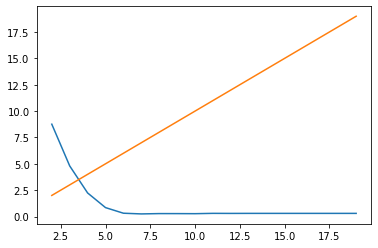

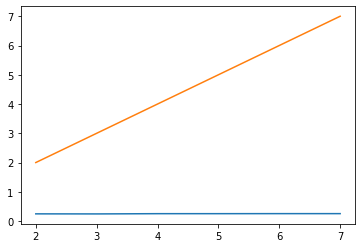

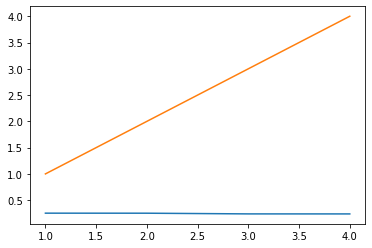

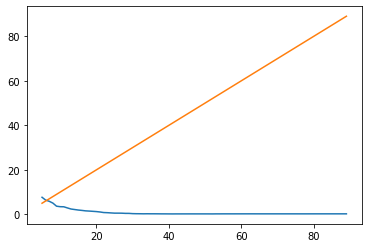

0.20173806913358194

In [ ]:
def hyper_paramater(parameters):

  parameters=['max_depth', 'min_samples_split', 'min_samples_leaf','max_leaf_nodes']
  max_depth=[i for i in range(2,20,1)]
  min_samples_split=[i for i in range(2,8,1)]
  M=0
  mae=[]
  for val in max_depth:
    regressor = DecisionTreeRegressor(max_depth=val,random_state = 0) 
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_valid)
    m=mean_squared_error(y_valid,y_pred)
    mae.append((m,val))
  Min_depth=min(mae)
  plt.plot(max_depth,mae)
  plt.show()
  new_mae=[]
  for val in min_samples_split:
    regressor = DecisionTreeRegressor(max_depth=7,min_samples_split=val,random_state = 0) 
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_valid)
    m=mean_squared_error(y_valid,y_pred)
    new_mae.append((m,val))
  Min_split=min(new_mae)  
  plt.plot(min_samples_split,new_mae)
  plt.show()
  Min_split,Min_depth
  Min_samples_leaf=[i for i in range(1,5,1)]
  final_mae=[]
  for val in Min_samples_leaf:
    regressor = DecisionTreeRegressor(max_depth=7,min_samples_leaf=val,min_samples_split=5,random_state = 0) 
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_valid)
    m=mean_squared_error(y_valid,y_pred)
    final_mae.append((m,val))
  plt.plot(Min_samples_leaf,final_mae)
  plt.show()  
  min(final_mae)
  max_leaf_nodes=[i for i in range(5,90,1)]
  last_mae=[]
  for val in max_leaf_nodes:
    regressor = DecisionTreeRegressor(max_depth=7,min_samples_split=5,min_samples_leaf=3,max_leaf_nodes=val,random_state = 0) 
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_valid)
    m=mean_squared_error(y_valid,y_pred)
    last_mae.append((m,val))
  plt.plot(max_leaf_nodes,last_mae)
  plt.show()    
  x=min(last_mae)

  return x[0]
parameters=['max_depth', 'min_samples_split', 'min_samples_leaf','max_leaf_nodes']  
hyper_paramater(parameters)  

In [ ]:
from sklearn.model_selection import cross_val_score
regressor =  DecisionTreeRegressor(max_depth=7,min_samples_split=5,min_samples_leaf=3,max_leaf_nodes=54,random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
scores = cross_val_score(regressor, x_train, y_train, cv=5)
print(scores)
mae=mean_squared_error(y_test,y_pred)
mae

[0.99754858 0.99588006 0.99501457 0.99317075 0.99610029]


0.2593170594038939

In [ ]:
from sklearn import tree
import graphviz
graph=tree.export_graphviz(regressor)
graph3 = graphviz.Source(graph, format="png") 
graph3.render('model3', view=True)

'model3.png'